# Heart Disease Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_file_path = "DATASET\heart_disease_data.csv"
df = pd.read_csv(data_file_path)
df.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.shape

(303, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
df.groupby("sex").target.mean() * 100

sex
0    75.000000
1    44.927536
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

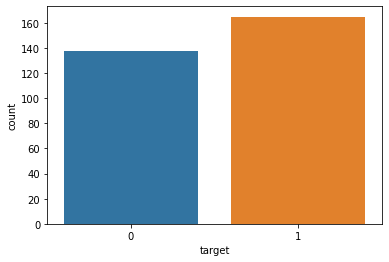

In [9]:
import seaborn as sbrn
sbrn.countplot(x = "target", data = df)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

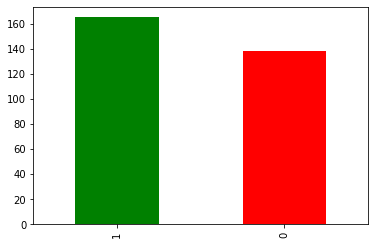

In [11]:
df['target'].value_counts().plot(kind = 'bar', color = ['green','red'])

<AxesSubplot:ylabel='Frequency'>

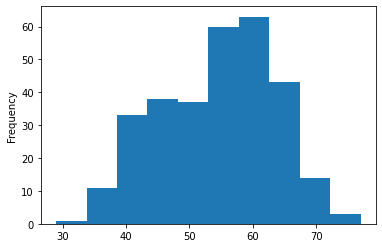

In [12]:
df["age"].plot(kind = "hist")

In [13]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


# Modelling

In [14]:
cols = ["age", "sex","cp","trestbps","chol","fbs","restecg","thalach", "oldpeak","slope","ca", "thal"]

XS = df[list(cols)]
Y = df["target"]
XS.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
235,51,1,0,140,299,0,1,173,1.6,2,0,3
258,62,0,0,150,244,0,1,154,1.4,1,0,2
105,68,0,2,120,211,0,0,115,1.5,1,0,2
299,45,1,3,110,264,0,1,132,1.2,1,0,3


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train, y_val = train_test_split(XS, Y, test_size = 0.25, random_state = 1)

# LOgistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
LOGST_R = LogisticRegression(random_state = 42, max_iter = 1000)
LOGST_R.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_output_prediction = LOGST_R.predict(x_val)
y_output_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [18]:
new_df = pd.DataFrame({"Actual TArgets" : y_val, "Predicted TArgets" : y_output_prediction})
new_df.sample(10)

,Actual TArgets,Predicted TArgets
295,0,0
229,0,0
110,1,1
78,1,1
59,1,1
269,0,0
146,1,1
167,0,0
223,0,0
89,1,1


In [19]:
example_measures = np.array([
    [29, 1 ,0, 109, 165, 0, 1, 140, 3.5, 1, 0, 2],
    [74, 0 ,1, 254, 154,1, 1, 200, 2.0, 0, 0, 3]], dtype = np.float64)

our_prediction = LOGST_R.predict(example_measures)
our_prediction

array([0, 0], dtype=int64)

# Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report
Accuracy = accuracy_score(y_val, y_output_prediction)
print(" The Accuracy Of This Model is: {}".format(float(Accuracy * 100)) + str("%")) ; print()
print('CLassification Report :{}'.format(classification_report(y_val, y_output_prediction, zero_division = 1)))

 The Accuracy Of This Model is: 77.63157894736842%

CLassification Report :              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.76      0.85      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_val , y_pred = y_output_prediction)
cm

array([[24, 11],
       [ 6, 35]], dtype=int64)

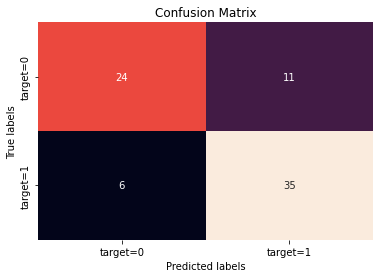

In [22]:
ax = plt.subplot()
sbrn.heatmap(cm, annot=True, ax = ax, cbar=False)


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

In [28]:
def Accuracy_Processing(TN,TP, FN, FP) : 
    return (TN + TP ) / (TN + TP + FP + FN) * 100
print(Accuracy_Processing(cm[0][0], cm[1][1],cm[0][1],cm[1][0]))

77.63157894736842
